In the second Iteration we apply max pooling layer after the Recptive field reaches 22x22 since the kernels can predict the edges and gradiesnts at the resolution of 11x11 and we also apply another MP layers to reduce the number of Convolution layers in the architecture and run it for 15 epochs. Here we can see that the code is performing well at accuracy 99.27 as compared to 1st iteration (98.8 at 15th epoch and 99.01 at 30th epoch) but still we can't consider this one as the optimized architecture since it is consuming 227,546 parameters which is huge. In the upcoming models we need to concentrate on both test accuracy and the number of parameters.

Using TensorFlow backend.


(60000, 28, 28)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

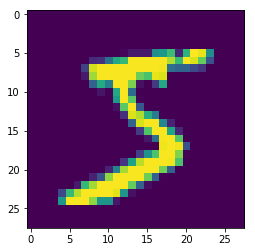

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train[:10]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]


In [2]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))     
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, 3))
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          73792     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
__________

In [5]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
  608/60000 [..............................] - ETA: 18s - loss: 0.0034 - acc: 0.9967

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 14s 232us/step - loss: 0.0084 - acc: 0.9979 - val_loss: 0.0534 - val_acc: 0.9914
Epoch 2/15
60000/60000 [==============================] - 14s 230us/step - loss: 0.0047 - acc: 0.9989 - val_loss: 0.0447 - val_acc: 0.9919
Epoch 3/15
60000/60000 [==============================] - 14s 230us/step - loss: 0.0058 - acc: 0.9986 - val_loss: 0.0506 - val_acc: 0.9926
Epoch 4/15
60000/60000 [==============================] - 14s 229us/step - loss: 0.0063 - acc: 0.9984 - val_loss: 0.0477 - val_acc: 0.9929
Epoch 5/15
60000/60000 [==============================] - 15s 243us/step - loss: 0.0077 - acc: 0.9983 - val_loss: 0.0449 - val_acc: 0.9927
Epoch 6/15
60000/60000 [==============================] - 14s 232us/step - loss: 0.0064 - acc: 0.9987 - val_loss: 0.0626 - val_acc: 0.9902
Epoch 7/15
60000/60000 [==============================] - 14s 229us/step - loss: 0.0066 - acc: 0.9985 - val_loss: 0.0500 - val_acc: 0.9929
Epoch 8/15
60000/60000 [==============

In [6]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04934936067415681, 0.9927]


In [8]:
print(y_pred[:9])
print(y_test[:9])

[[4.2096090e-16 4.5853329e-20 1.0566038e-18 1.8971029e-14 7.5327556e-29
  3.2298581e-25 2.6177810e-28 1.0000000e+00 1.9340221e-25 8.7780135e-20]
 [5.8638784e-28 5.3313477e-28 1.0000000e+00 2.7707117e-37 1.5647307e-34
  0.0000000e+00 1.6483850e-26 1.4796759e-37 8.6138503e-27 0.0000000e+00]
 [5.9838656e-14 1.0000000e+00 1.3899510e-13 1.3208115e-18 5.9558103e-10
  2.3288066e-15 3.8601521e-14 2.7730616e-09 7.4445734e-13 1.2956912e-12]
 [1.0000000e+00 2.1880362e-23 3.2305969e-18 5.7434759e-25 4.1729210e-21
  1.8981057e-25 2.1255948e-14 1.3640790e-20 1.2591664e-22 1.1368075e-14]
 [0.0000000e+00 4.8507978e-23 1.7307722e-32 1.4312217e-37 1.0000000e+00
  1.9984219e-34 1.7258860e-33 6.0524343e-23 1.0716932e-24 1.7594230e-10]
 [6.0445880e-16 1.0000000e+00 2.5313411e-11 6.6040668e-19 1.6230467e-10
  1.9484850e-17 9.1441620e-15 2.5707295e-10 1.8002989e-13 2.6340963e-15]
 [5.3432433e-26 1.6729647e-18 1.9845591e-25 3.1172356e-32 1.0000000e+00
  3.9669361e-31 9.7929324e-32 1.9966007e-19 2.1093650e-16 